# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Reading data & Pre-processing

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_data = pd.read_csv('fashion-mnist_test.csv')
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train_data.iloc[:, 1:].values
Y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
Y_test = test_data.iloc[:, 0].values

# Setting up the Decision Tree

Here we model the data with depth of Decision Tree from 1 to 10.

After that we will decide the max_depth of our Tree for greater accuracy

In [5]:
acc_list = list()
from sklearn import metrics
for n in range(1, 11):
    LabelTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    LabelTree.fit(X_train,Y_train)
    predTree = LabelTree.predict(X_test)
    acc = metrics.accuracy_score(Y_test, predTree)
    acc_list.append(acc)
    print("DecisionTrees's Accuracy for depth " + str(n) + ' is: ', acc)

DecisionTrees's Accuracy for depth 1 is:  0.1991
DecisionTrees's Accuracy for depth 2 is:  0.3408
DecisionTrees's Accuracy for depth 3 is:  0.526
DecisionTrees's Accuracy for depth 4 is:  0.6665
DecisionTrees's Accuracy for depth 5 is:  0.7087
DecisionTrees's Accuracy for depth 6 is:  0.749
DecisionTrees's Accuracy for depth 7 is:  0.7763
DecisionTrees's Accuracy for depth 8 is:  0.7923
DecisionTrees's Accuracy for depth 9 is:  0.8055
DecisionTrees's Accuracy for depth 10 is:  0.8103


Plot the Accuracy for different depths with matplotlib

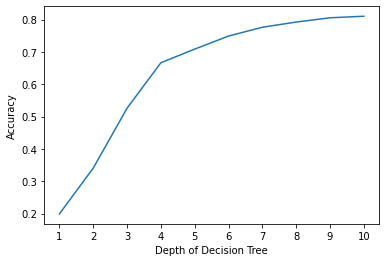

In [6]:
axes = plt.axes()
axes.set_xticks(range(11))
plt.plot(range(1,11), acc_list)
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.show()

From the plot abouve, we get to know that after depth 7, the slope of the graph tends to 0. This indicates that the accuracy is not increasing significantly after depth 7. So we select our final depth as 8 and do not increase the depths as it only increases the computational time 

## Final Model

In [7]:
LabelTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
LabelTree.fit(X_train,Y_train)
predTree = LabelTree.predict(X_test)

In [8]:
acc = metrics.accuracy_score(Y_test, predTree)
print('The accuracy of the model is ' + str(acc))

The accuracy of the model is 0.7921


In [9]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cfm = pd.DataFrame(confusion_matrix(Y_test, predTree))
cfm.columns= range(10)
cfm.index = range(10)
cfm

,0,1,2,3,4,5,6,7,8,9
0,821,5,27,50,5,3,74,1,14,0
1,15,926,7,36,6,1,6,1,2,0
2,16,2,738,9,182,0,44,0,8,1
3,53,19,15,844,23,0,37,3,4,2
4,3,0,121,117,686,0,68,0,5,0
5,2,3,1,3,0,848,1,89,7,46
6,221,6,170,35,145,0,402,0,20,1
7,0,0,0,0,0,45,0,815,1,139
8,6,5,13,5,18,14,9,9,911,10
9,0,0,3,1,0,25,0,37,4,930
